# Prediction using Unsupervised ML

##  Task 2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### By:S.Subiksha

In [45]:
#import all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#load and display the dataset from drive
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head() # The first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [48]:
df.isnull().sum()#count of number of null values present in the dataset

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [49]:
df.describe().T#summary and analysis of the ataset

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


### Finding Outliers

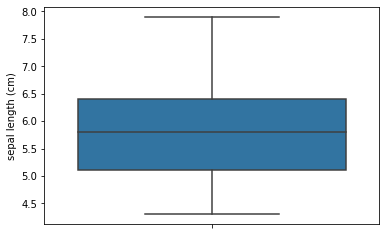

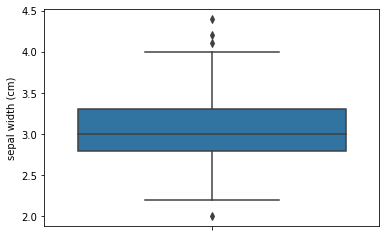

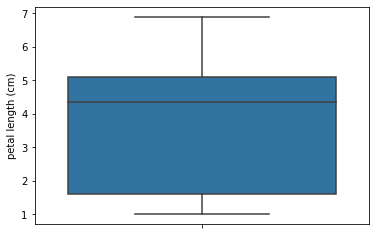

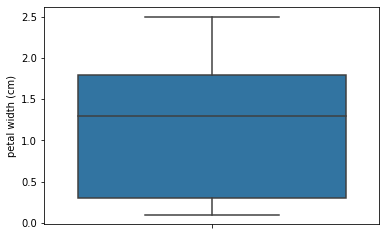

In [50]:
cols = df.columns
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [51]:
# Standardizing to avoid bias
standard_scaler = StandardScaler()
df_norm = standard_scaler.fit_transform(df)


In [52]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

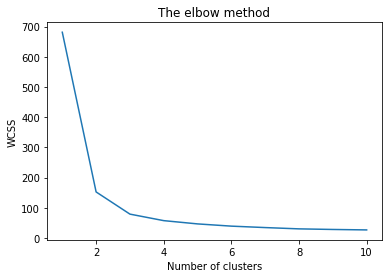

In [53]:

# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [54]:
# Applying kmeans to the dataset 
# Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [55]:
#analysis of cluster found
df.index = pd.RangeIndex(len(df.index))
df_km = pd.concat([df, pd.Series(kmeans.labels_)], axis=1)
df_km.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'ClusterID']

km_clusters_Slength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal length (cm)':'mean'}))
km_clusters_Swidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'sepal width (cm)':'mean'}))
km_clusters_Plength = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal length (cm)':'mean'}))
km_clusters_Pwidth = pd.DataFrame(df_km.groupby(['ClusterID']).agg({'petal width (cm)':'mean'}))

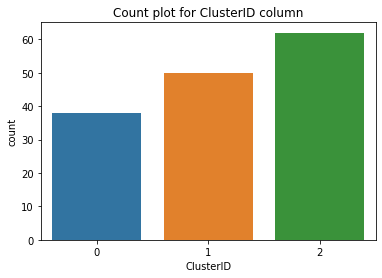

In [56]:
sns.countplot(x=df_km.ClusterID)
plt.title('Count plot for ClusterID column')
plt.show()

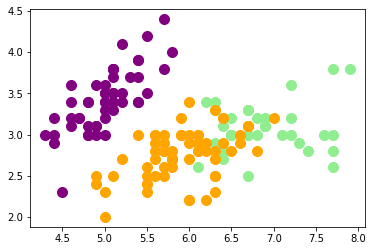

In [57]:
# Visualising the clusters 
# Preferably on the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

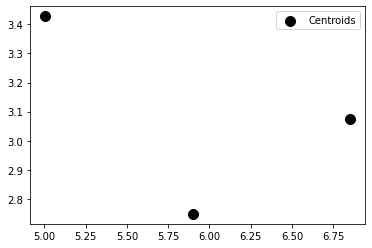

In [58]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

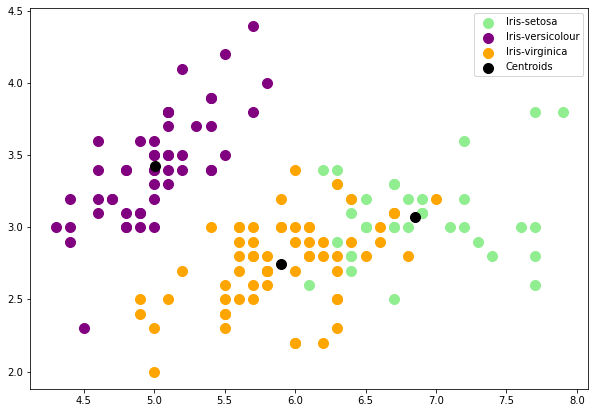

In [59]:
# Visualising the clusters 
plt.figure(figsize=(10,7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightgreen', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'purple', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'orange', label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

# End